In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from xgboost import XGBClassifier   # XGBoost classifier
from sklearn.model_selection import StratifiedKFold # cross validation
from sklearn import metrics # metric measure
import numpy as np # linear algebra
import pandas as pd #   data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline # plot in the notebook
import matplotlib.pyplot as plt # plot
import seaborn as sns # plot
from sklearn.model_selection import train_test_split # split data

In [ ]:
# functions 

def show_confusion_matrix(validations, predictions):
    LABELS = ['Real','Fake']
    matrix = metrics.confusion_matrix(validations, predictions)
    # plt.figure(dpi=400,figsize=(4.5, 3))
    plt.figure(figsize=(4.5, 3))
    sns.heatmap(matrix,
                cmap='Blues',
                linecolor='white',
                linewidths=2,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()

## Read data

In [19]:
real_urls = pd.read_csv("data/legitimate-urls.csv") # read the csv files
fake_urls = pd.read_csv("data/phishing-urls.csv")

data = pd.concat([real_urls, fake_urls]) # concatenate the two dataframes
data = data.sample(frac=1).reset_index(drop=True) # shuffle the data
data.head()

,Domain,Having_@_symbol,Having_IP,Path,Prefix_suffix_separation,Protocol,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,label,statistical_report,tiny_url,web_traffic
0,www.gwvirginia.gwu.edu,0,0,/,0,http,0,2,0,1,0,1,0,0,0,0,0
1,innamorata.com.ar,0,0,/melodyfriespitchment/Docusign/index.php,0,http,0,2,2,1,1,1,0,1,0,0,1
2,www.tinyjewels.homestead.com,0,0,/index.html,0,http,0,1,0,0,0,0,0,0,0,0,1
3,protecfb-error.esy.es,0,0,/recovery-chekpoint-login.html,1,http,0,2,2,1,1,1,0,1,1,0,1
4,karuniabinainsani-16.co.id,0,0,/wp-includes/dev24/home/confirm.php,1,http,0,2,2,1,1,1,0,1,1,0,1


## Preprocessing

In [20]:
col = list(data.columns) # get the column names
col.remove ('Domain') # remove the domain column
col.remove ('Path')
col.remove ('Protocol')
col.remove ('label')
col.append('label') # append the label column to the end

X = data[col[:-1]] # get the features
y = data[col[-1]] # get the labels


0.84 / [0.83, 0.85, 0.83, 0.82, 0.86]
              precision    recall  f1-score   support

           0       0.76      0.83      0.80       307
           1       0.81      0.73      0.77       298

    accuracy                           0.78       605
   macro avg       0.79      0.78      0.78       605
weighted avg       0.79      0.78      0.78       605



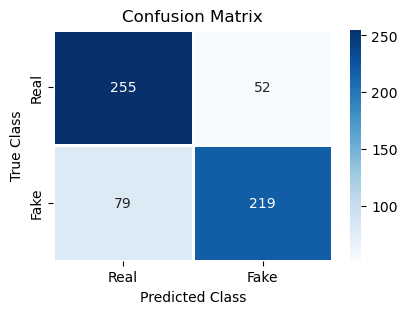

In [34]:
# cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
accs = []
for train_idx, test_idx in skf.split(X, y):
    Xtrain = X.iloc[train_idx]
    ytrain = y.iloc[train_idx]
    Xtest = X.iloc[test_idx]
    ytest = y.iloc[test_idx]

    model = XGBClassifier()
    model.fit(Xtrain, ytrain)
    pred = model.predict(Xtest)

    accs.append(metrics.roc_auc_score(ytest, pred))

print(f"{np.mean(accs).round(2)} / {[acc.round(2) for acc in accs]}")

# train test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)
model = XGBClassifier()
model.fit(Xtrain, ytrain)
pred = model.predict(Xtest)
print(metrics.classification_report(ytest, pred))
metrics.confusion_matrix(ytest, pred)
show_confusion_matrix(ytest, pred)
